<a href="https://colab.research.google.com/github/JoDeMiro/Matplotlib/blob/main/Matplotlib_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://github.com/JoDeMiro/Matplotlib/blob/main/Matplotlib.png?raw=true' />


[MRI With EEG](#mri_with_eeg)

https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html

[Hinton Diagramm](#hinton_diagramm)

https://matplotlib.org/stable/gallery/specialty_plots/hinton_demo.html


<a name="mri_with_eeg">

## MRI with EEG

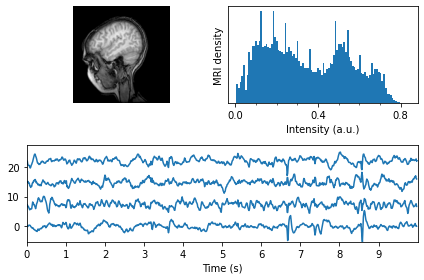

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

fig = plt.figure("MRI_with_EEG")

# Load the MRI data (256x256 16 bit integers)
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

# Plot the MRI image
ax0 = fig.add_subplot(2, 2, 1)
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')

# Plot the histogram of MRI intensity
ax1 = fig.add_subplot(2, 2, 2)
im = np.ravel(im)
im = im[np.nonzero(im)]  # Ignore the background
im = im / (2**16 - 1)  # Normalize
ax1.hist(im, bins=100)
ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax1.minorticks_on()
ax1.set_yticks([])
ax1.set_xlabel('Intensity (a.u.)')
ax1.set_ylabel('MRI density')

# Load the EEG data
n_samples, n_rows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    data = np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))
t = 10 * np.arange(n_samples) / n_samples

# Plot the EEG
ticklocs = []
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(10))
dmin = data.min()
dmax = data.max()
dr = (dmax - dmin) * 0.7  # Crowd them a bit.
y0 = dmin
y1 = (n_rows - 1) * dr + dmax
ax2.set_ylim(y0, y1)

segs = []
for i in range(n_rows):
    segs.append(np.column_stack((t, data[:, i])))
    ticklocs.append(i * dr)

offsets = np.zeros((n_rows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None)
ax2.add_collection(lines)

# Set the yticks to use axes coordinates on the y axis
# ax2.set_yticks(ticklocs, labels=['PG3', 'PG5', 'PG7', 'PG9'])

ax2.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()

<a name="hinton_diagramm">

## Hinton Diagramm

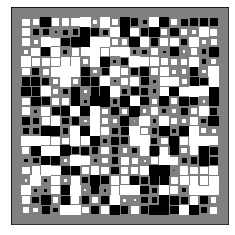

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()


## Anscombe's quartet

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) is a group of datasets (x, y) that have the same mean, standard deviation, and regression line, but which are qualitatively different.

It is often used to illustrate the importance of looking at a set of data graphically and not only relying on basic statistic properties.



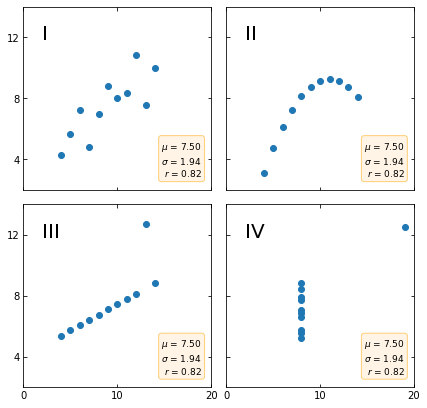

In [79]:

# https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(7, 7),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    # ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

## Symlog Demo

Example use of symlog (symmetric log) axis scaling.

https://matplotlib.org/stable/gallery/scales/symlog_demo.html

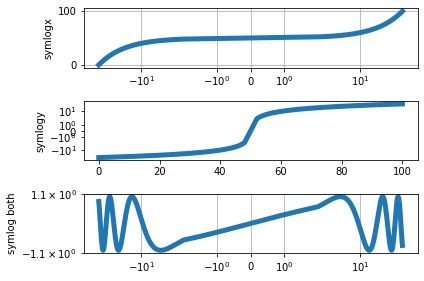

In [77]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.01
x = np.arange(-50.0, 50.0, dt)
y = np.arange(0, 100.0, dt)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)

ax0.plot(x, y)
ax0.set_xscale('symlog')
ax0.set_ylabel('symlogx')
ax0.grid()
ax0.xaxis.grid(which='minor')  # minor grid on too

ax1.plot(y, x)
ax1.set_yscale('symlog')
ax1.set_ylabel('symlogy')

ax2.plot(x, np.sin(x / 3.0))
ax2.set_xscale('symlog')
# ax2.set_yscale('symlog', linthresh=0.015)
ax2.set_yscale('symlog')
ax2.grid()
ax2.set_ylabel('symlog both')

fig.tight_layout()
plt.show()

## Scales

Illustrate the scale transformations applied to axes, e.g. log, symlog, logit.

The last two examples are examples of using the 'function' scale by supplying forward and inverse functions for the scale transformation.

https://matplotlib.org/stable/gallery/scales/scales.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError


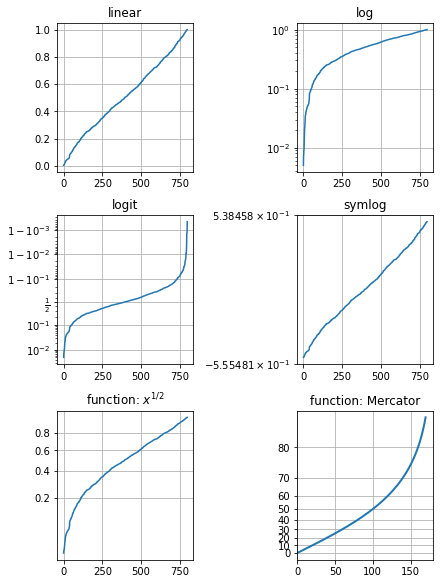

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FixedLocator

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
fig, axs = plt.subplots(3, 2, figsize=(6, 8),
                        constrained_layout=True)

# linear
ax = axs[0, 0]
ax.plot(x, y)
ax.set_yscale('linear')
ax.set_title('linear')
ax.grid(True)


# log
ax = axs[0, 1]
ax.plot(x, y)
ax.set_yscale('log')
ax.set_title('log')
ax.grid(True)


# symmetric log
ax = axs[1, 1]
ax.plot(x, y - y.mean())
ax.set_yscale('symlog', linthresh=0.02)
ax.set_title('symlog')
ax.grid(True)

# logit
ax = axs[1, 0]
ax.plot(x, y)
ax.set_yscale('logit')
ax.set_title('logit')
ax.grid(True)


# Function x**(1/2)
def forward(x):
    return x**(1/2)


def inverse(x):
    return x**2


ax = axs[2, 0]
ax.plot(x, y)
ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: $x^{1/2}$')
ax.grid(True)
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)**2))
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)))


# Function Mercator transform
def forward(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.log(np.abs(np.tan(a) + 1.0 / np.cos(a))))


def inverse(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.arctan(np.sinh(a)))

ax = axs[2, 1]

t = np.arange(0, 170.0, 0.1)
s = t / 2.

ax.plot(t, s, '-', lw=2)

ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: Mercator')
ax.grid(True)
ax.set_xlim([0, 180])
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 90, 10)))

plt.show()

## Logit Demo

Examples of plots with logit axes.

https://matplotlib.org/stable/gallery/scales/logit_demo.html

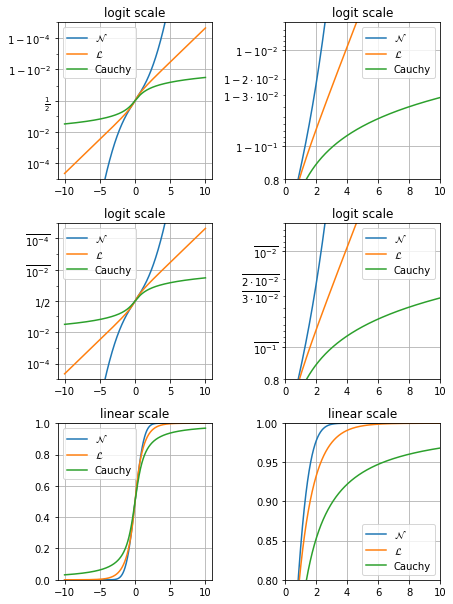

In [9]:
import math

import numpy as np
import matplotlib.pyplot as plt

xmax = 10
x = np.linspace(-xmax, xmax, 10000)
cdf_norm = [math.erf(w / np.sqrt(2)) / 2 + 1 / 2 for w in x]
cdf_laplacian = np.where(x < 0, 1 / 2 * np.exp(x), 1 - 1 / 2 * np.exp(-x))
cdf_cauchy = np.arctan(x) / np.pi + 1 / 2

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(6.4, 8.5))

# Common part, for the example, we will do the same plots on all graphs
for i in range(3):
    for j in range(2):
        axs[i, j].plot(x, cdf_norm, label=r"$\mathcal{N}$")
        axs[i, j].plot(x, cdf_laplacian, label=r"$\mathcal{L}$")
        axs[i, j].plot(x, cdf_cauchy, label="Cauchy")
        axs[i, j].legend()
        axs[i, j].grid()

# First line, logitscale, with standard notation
axs[0, 0].set(title="logit scale")
axs[0, 0].set_yscale("logit")
axs[0, 0].set_ylim(1e-5, 1 - 1e-5)

axs[0, 1].set(title="logit scale")
axs[0, 1].set_yscale("logit")
axs[0, 1].set_xlim(0, xmax)
axs[0, 1].set_ylim(0.8, 1 - 5e-3)

# Second line, logitscale, with survival notation (with `use_overline`), and
# other format display 1/2
axs[1, 0].set(title="logit scale")
axs[1, 0].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 0].set_ylim(1e-5, 1 - 1e-5)

axs[1, 1].set(title="logit scale")
axs[1, 1].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 1].set_xlim(0, xmax)
axs[1, 1].set_ylim(0.8, 1 - 5e-3)

# Third line, linear scale
axs[2, 0].set(title="linear scale")
axs[2, 0].set_ylim(0, 1)

axs[2, 1].set(title="linear scale")
axs[2, 1].set_xlim(0, xmax)
axs[2, 1].set_ylim(0.8, 1)

fig.tight_layout()
plt.show()

## Log Axis

This is an example of assigning a log-scale for the x-axis using semilogx.

https://matplotlib.org/stable/gallery/scales/log_test.html

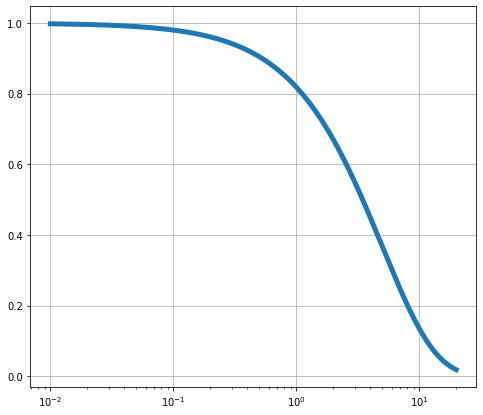

In [76]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8,7))

dt = 0.01
t = np.arange(dt, 20.0, dt)

ax.semilogx(t, np.exp(-t / 5.0))
ax.grid()

plt.show()

## 3D wireframe plots in one direction

Demonstrates that setting rstride or cstride to 0 causes wires to not be generated in the corresponding direction.

https://matplotlib.org/stable/gallery/mplot3d/wire3d_zero_stride.html

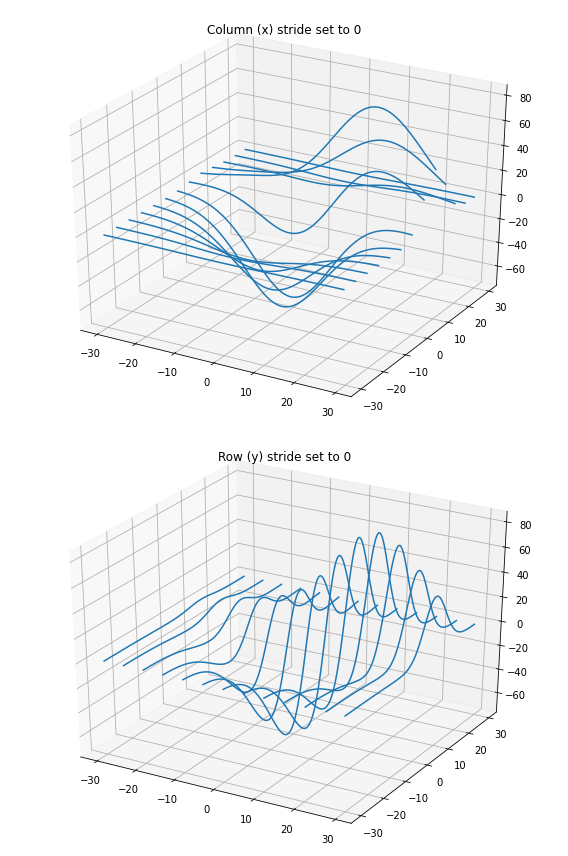

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=0)
ax1.set_title("Column (x) stride set to 0")

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X, Y, Z, rstride=0, cstride=10)
ax2.set_title("Row (y) stride set to 0")

plt.tight_layout()
plt.show()

## Rotating 3D wireframe plot

A very simple 'animation' of a 3D plot. See also rotate_axes3d_demo.

(This example is skipped when building the documentation gallery because it intentionally takes a long time to run)

https://matplotlib.org/stable/gallery/mplot3d/wire3d_animation_sgskip.html

Average FPS: 14.129991


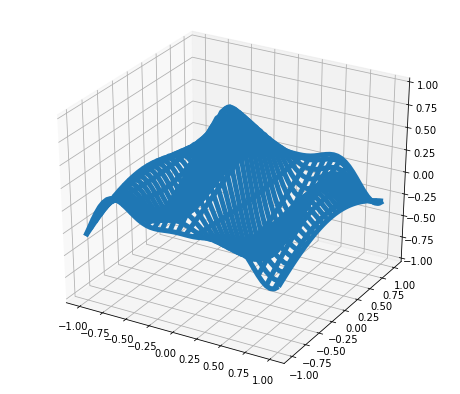

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import time


def generate(X, Y, phi):
    """
    Generates Z data for the points in the X, Y meshgrid and parameter phi.
    """
    R = 1 - np.sqrt(X**2 + Y**2)
    return np.cos(2 * np.pi * X + phi) * R


fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-1, 1)

# Begin plotting.
wframe = None
tstart = time.time()
for phi in np.linspace(0, 180. / np.pi, 100):
    # If a line collection is already remove it before drawing.
    if wframe:
        ax.collections.remove(wframe)

    # Plot the new wireframe and pause briefly before continuing.
    Z = generate(X, Y, phi)
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
    plt.pause(.001)

print('Average FPS: %f' % (100 / (time.time() - tstart)))

## 3D wireframe plot

A very basic demonstration of a wireframe plot.

https://matplotlib.org/stable/gallery/mplot3d/wire3d.html

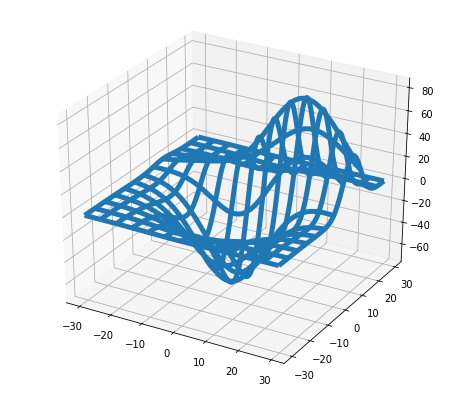

In [74]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

## 3D voxel / volumetric plot with cylindrical coordinates

Demonstrates using the x, y, z parameters of Axes3D.voxels.

https://matplotlib.org/stable/gallery/mplot3d/voxels_torus.html


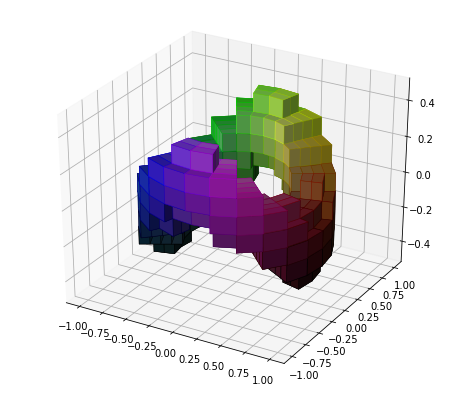

In [73]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np


def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, theta, z = np.mgrid[0:1:11j, 0:np.pi*2:25j, -0.5:0.5:11j]
x = r*np.cos(theta)
y = r*np.sin(theta)

rc, thetac, zc = midpoints(r), midpoints(theta), midpoints(z)

# define a wobbly torus about [0.7, *, 0]
sphere = (rc - 0.7)**2 + (zc + 0.2*np.cos(thetac*2))**2 < 0.2**2

# combine the color components
hsv = np.zeros(sphere.shape + (3,))
hsv[..., 0] = thetac / (np.pi*2)
hsv[..., 1] = rc
hsv[..., 2] = zc + 0.5
colors = matplotlib.colors.hsv_to_rgb(hsv)

# and plot everything
ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')
ax.voxels(x, y, z, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

plt.show()

## 3D voxel plot of the numpy logo

Demonstrates using Axes3D.voxels with uneven coordinates.

https://matplotlib.org/stable/gallery/mplot3d/voxels_numpy_logo.html

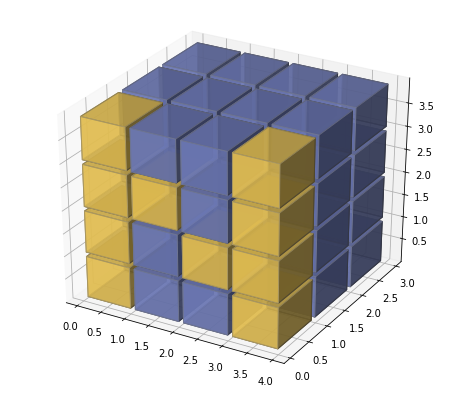

In [72]:
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)

plt.show()

## Triangular 3D surfaces

Plot a 3D surface with a triangular mesh.

https://matplotlib.org/stable/gallery/mplot3d/trisurf3d.html

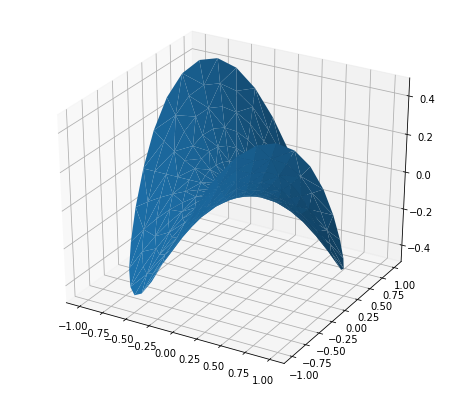

In [71]:
import matplotlib.pyplot as plt
import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

3D surface with polar coordinates

Demonstrates plotting a surface defined in polar coordinates. Uses the reversed version of the YlGnBu colormap. Also demonstrates writing axis labels with latex math mode.

Example contributed by Armin Moser.

https://matplotlib.org/stable/gallery/mplot3d/surface3d_radial.html

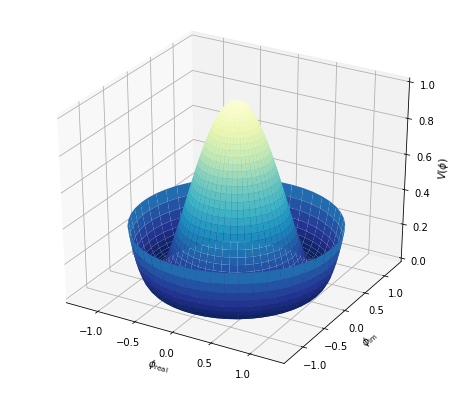

In [70]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

## 3D plots as subplots

Demonstrate including 3D plots as subplots.

https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html

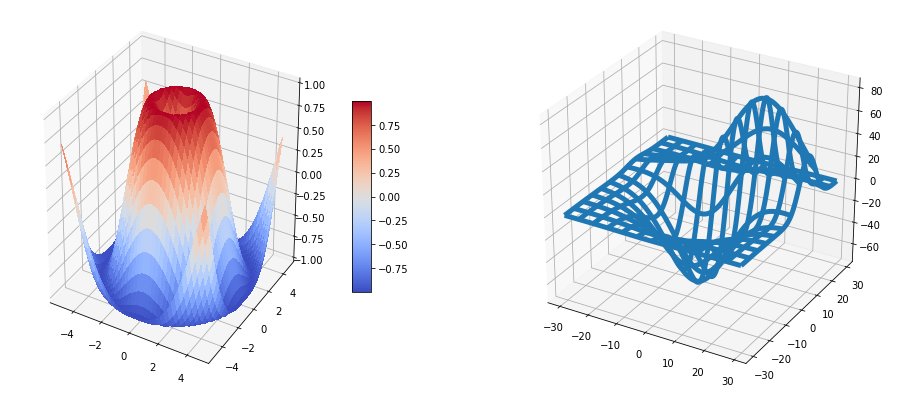

In [69]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(16,7))

# First subplot

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# Second subplot

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

## 3D stem

Demonstration of a stem plot in 3D, which plots vertical lines from a baseline to the z-coordinate and places a marker at the tip.

https://matplotlib.org/stable/gallery/mplot3d/stem3d_demo.html

TypeError: ignored

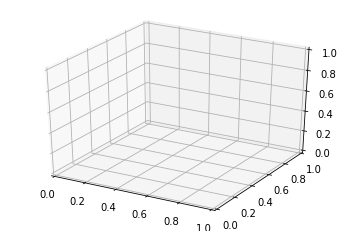

In [20]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(x, y, z)

plt.show()

## 3D scatterplot

Demonstration of a basic scatterplot in 3D.

https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

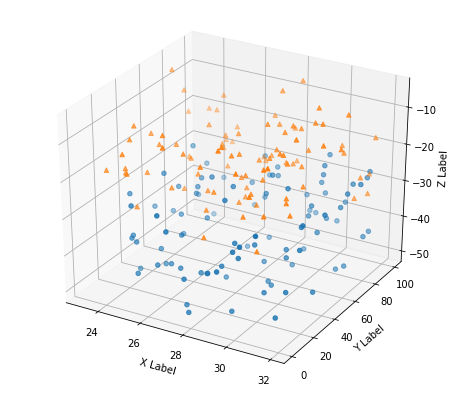

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Rotating a 3D plot

A very simple animation of a rotating 3D plot.

See wire3d_animation_demo for another simple example of animating a 3D plot.

(This example is skipped when building the documentation gallery because it intentionally takes a long time to run)

https://matplotlib.org/stable/gallery/mplot3d/rotate_axes3d_sgskip.html

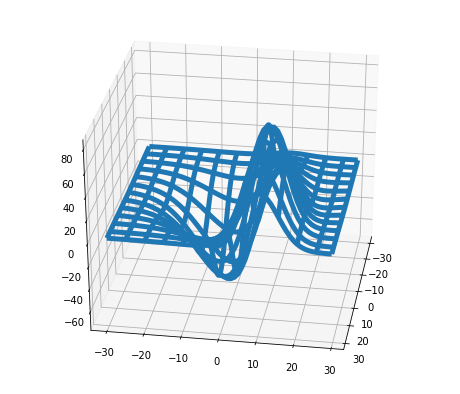

In [65]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 10):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

## Generate polygons to fill under 3D line graph

Demonstrate how to create polygons which fill the space under a line graph. In this example polygons are semi-transparent, creating a sort of 'jagged stained glass' effect.

https://matplotlib.org/stable/gallery/mplot3d/polys3d.html

TypeError: ignored

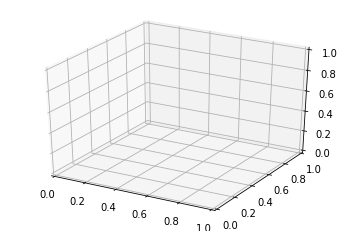

In [24]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Fixing random state for reproducibility
np.random.seed(19680801)


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
lambdas = range(1, 9)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()

## Draw flat objects in 3D plot

Demonstrate using pathpatch_2d_to_3d to 'draw' shapes and text on a 3D plot.

https://matplotlib.org/stable/gallery/mplot3d/pathpatch3d.html

RuntimeError: ignored

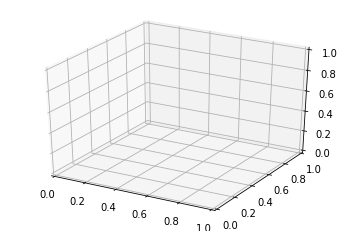

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    """
    Plots the string *s* on the axes *ax*, with position *xyz*, size *size*,
    and rotation angle *angle*. *zdir* gives the axis which is to be treated as
    the third dimension. *usetex* is a boolean indicating whether the string
    should be run through a LaTeX subprocess or not.  Any additional keyword
    arguments are forwarded to `.transform_path`.

    Note: zdir affects the interpretation of xyz.
    """
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((5, 5), 3)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

# Manually label the axes
text3d(ax, (4, -2, 0), "X-axis", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (12, 4, 0), "Y-axis", zdir="z", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")
text3d(ax, (12, 10, 4), "Z-axis", zdir="y", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")

# Write a Latex formula on the z=0 'floor'
text3d(ax, (1, 5, 0),
       r"$\displaystyle G_{\mu\nu} + \Lambda g_{\mu\nu} = "
       r"\frac{8\pi G}{c^4} T_{\mu\nu}  $",
       zdir="z", size=1, usetex=True,
       ec="none", fc="k")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

## 2D and 3D Axes in same Figure

This example shows a how to plot a 2D and 3D plot on the same figure.

https://matplotlib.org/stable/gallery/mplot3d/mixed_subplots.html

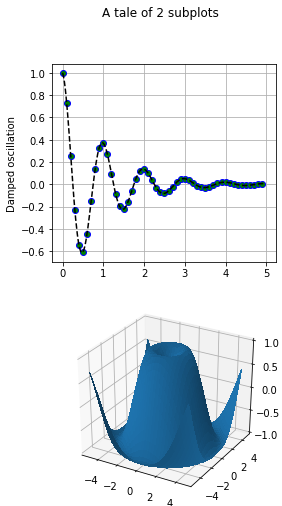

In [26]:
import matplotlib.pyplot as plt
import numpy as np


def f(t):
    return np.cos(2*np.pi*t) * np.exp(-t)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('A tale of 2 subplots')

# First subplot
ax = fig.add_subplot(2, 1, 1)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

ax.plot(t1, f(t1), 'bo',
        t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()

## Lorenz Attractor

This is an example of plotting Edward Lorenz's 1963 "Deterministic Nonperiodic Flow" in a 3-dimensional space using mplot3d.

> ⚠ Because this is a simple non-linear ODE, it would be more easily done using SciPy's ODE solver, but this approach depends only upon NumPy.

https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html

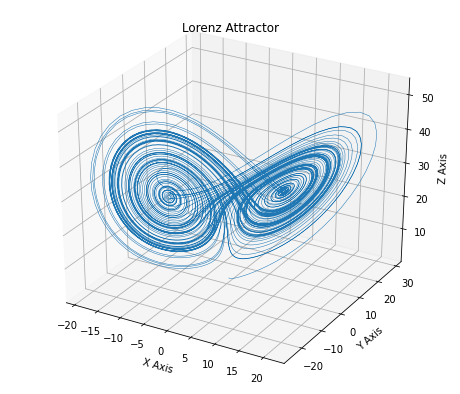

In [64]:
import numpy as np
import matplotlib.pyplot as plt


def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

## Parametric Curve

This example demonstrates plotting a parametric curve in 3D.

https://matplotlib.org/stable/gallery/mplot3d/lines3d.html


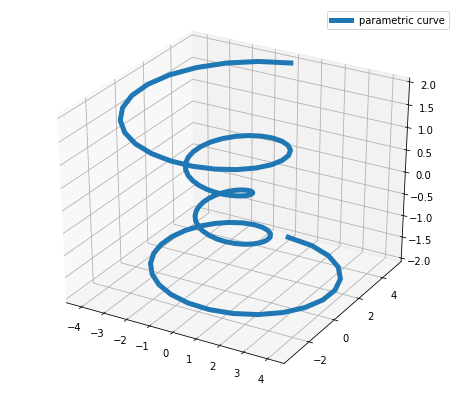

In [63]:
import numpy as np
import matplotlib.pyplot as plt


ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


## Projecting filled contour onto a graph

Demonstrates displaying a 3D surface while also projecting filled contour 'profiles' onto the 'walls' of the graph.

See contour3d_demo2 for the unfilled version.

https://matplotlib.org/stable/gallery/mplot3d/contourf3d_2.html


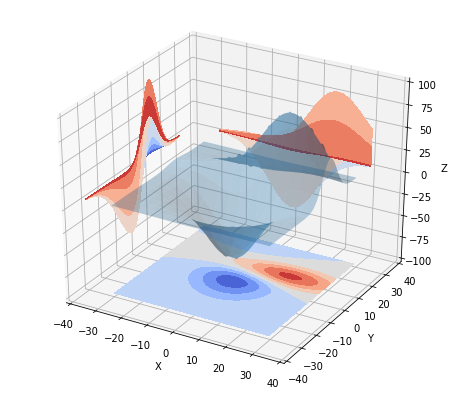

In [62]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

## Filled contours

contourf differs from contour in that it creates filled contours, ie. a discrete number of colours are used to shade the domain.

This is like a contourf plot in 2D except that the shaded region corresponding to the level c is graphed on the plane z=c.

https://matplotlib.org/stable/gallery/mplot3d/contourf3d.html

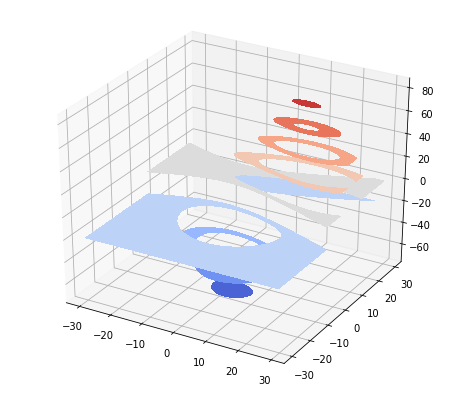

In [61]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.contourf(X, Y, Z, cmap=cm.coolwarm)

plt.show()

## Create 2D bar graphs in different planes

Demonstrates making a 3D plot which has 2D bar graphs projected onto planes y=0, y=1, etc.

https://matplotlib.org/stable/gallery/mplot3d/bars3d.html

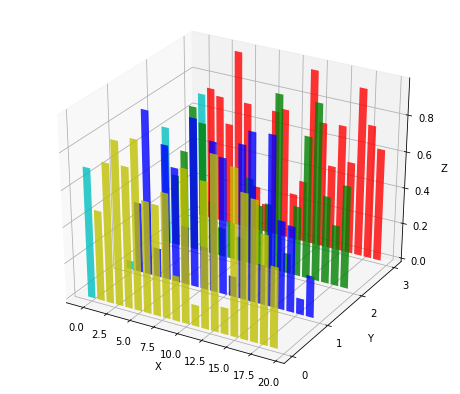

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

## Demo of 3D bar charts

A basic demo of how to plot 3D bars with and without shading.

https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html

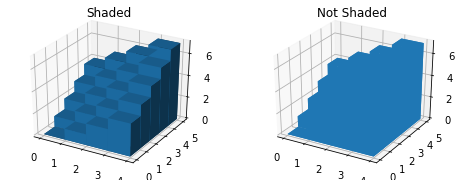

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

## Plot 2D data on 3D plot

Demonstrates using ax.plot's zdir keyword to plot 2D data on selective axes of a 3D plot.

https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html

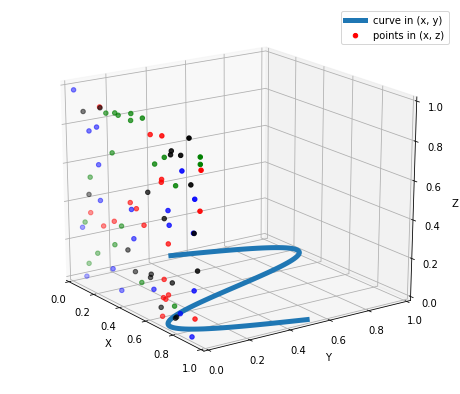

In [49]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(8,7)).add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

## Zorder Demo

The drawing order of artists is determined by their zorder attribute, which is a floating point number. Artists with higher zorder are drawn on top. You can change the order for individual artists by setting their zorder. The default value depends on the type of the Artist:

https://matplotlib.org/stable/gallery/misc/zorder_demo.html

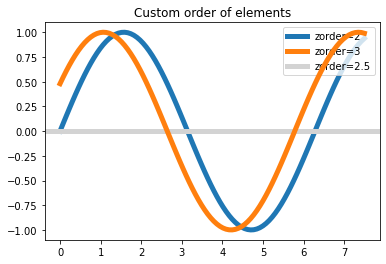

In [36]:
x = np.linspace(0, 7.5, 100)
plt.rcParams['lines.linewidth'] = 5
plt.figure()
plt.plot(x, np.sin(x), label='zorder=2', zorder=2)  # bottom
plt.plot(x, np.sin(x+0.5), label='zorder=3',  zorder=3)
plt.axhline(0, label='zorder=2.5', color='lightgrey', zorder=2.5)
plt.title('Custom order of elements')
l = plt.legend(loc='upper right')
l.set_zorder(2.5)  # legend between blue and orange line
plt.show()

## Plotting with keywords

There are some instances where you have data in a format that lets you access particular variables with strings: for example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

https://matplotlib.org/stable/gallery/misc/keyword_plotting.html

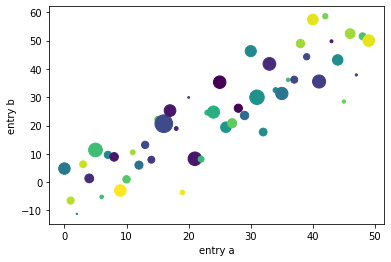

In [41]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(19680801)

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots()
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set(xlabel='entry a', ylabel='entry b')
plt.show()

In [42]:
import os

import matplotlib
import matplotlib.ft2font as ft


font = ft.FT2Font(
    # Use a font shipped with Matplotlib.
    os.path.join(matplotlib.get_data_path(),
                 'fonts/ttf/DejaVuSans-Oblique.ttf'))

print('Num faces:  ', font.num_faces)        # number of faces in file
print('Num glyphs: ', font.num_glyphs)       # number of glyphs in the face
print('Family name:', font.family_name)      # face family name
print('Style name: ', font.style_name)       # face style name
print('PS name:    ', font.postscript_name)  # the postscript name
print('Num fixed:  ', font.num_fixed_sizes)  # number of embedded bitmaps

# the following are only available if face.scalable
if font.scalable:
    # the face global bounding box (xmin, ymin, xmax, ymax)
    print('Bbox:               ', font.bbox)
    # number of font units covered by the EM
    print('EM:                 ', font.units_per_EM)
    # the ascender in 26.6 units
    print('Ascender:           ', font.ascender)
    # the descender in 26.6 units
    print('Descender:          ', font.descender)
    # the height in 26.6 units
    print('Height:             ', font.height)
    # maximum horizontal cursor advance
    print('Max adv width:      ', font.max_advance_width)
    # same for vertical layout
    print('Max adv height:     ', font.max_advance_height)
    # vertical position of the underline bar
    print('Underline pos:      ', font.underline_position)
    # vertical thickness of the underline
    print('Underline thickness:', font.underline_thickness)

for style in ('Italic',
              'Bold',
              'Scalable',
              'Fixed sizes',
              'Fixed width',
              'SFNT',
              'Horizontal',
              'Vertical',
              'Kerning',
              'Fast glyphs',
              'Multiple masters',
              'Glyph names',
              'External stream'):
    bitpos = getattr(ft, style.replace(' ', '_').upper()) - 1
    print(f"{style+':':17}", bool(font.style_flags & (1 << bitpos)))

Num faces:   1
Num glyphs:  5343
Family name: DejaVu Sans
Style name:  Oblique
PS name:     DejaVuSans-Oblique
Num fixed:   0
Bbox:                (-2080, -717, 3398, 2187)
EM:                  2048
Ascender:            1901
Descender:           -483
Height:              2384
Max adv width:       3461
Max adv height:      2384
Underline pos:       -175
Underline thickness: 90
Italic:           True
Bold:             False
Scalable:         True
Fixed sizes:      False
Fixed width:      False
SFNT:             False
Horizontal:       False
Vertical:         False
Kerning:          False
Fast glyphs:      False
Multiple masters: False
Glyph names:      False
External stream:  False


## Cross hair cursor

This example adds a cross hair as a data cursor. The cross hair is implemented as regular line objects that are updated on mouse move.

https://matplotlib.org/stable/gallery/misc/cursor_demo.html

5

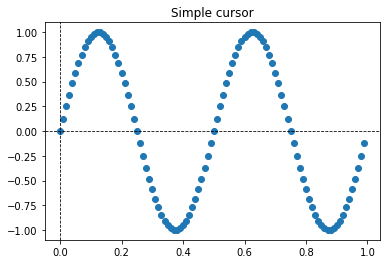

In [43]:
import matplotlib.pyplot as plt
import numpy as np


class Cursor:
    """
    A cross hair cursor.
    """
    def __init__(self, ax):
        self.ax = ax
        self.horizontal_line = ax.axhline(color='k', lw=0.8, ls='--')
        self.vertical_line = ax.axvline(color='k', lw=0.8, ls='--')
        # text location in axes coordinates
        self.text = ax.text(0.72, 0.9, '', transform=ax.transAxes)

    def set_cross_hair_visible(self, visible):
        need_redraw = self.horizontal_line.get_visible() != visible
        self.horizontal_line.set_visible(visible)
        self.vertical_line.set_visible(visible)
        self.text.set_visible(visible)
        return need_redraw

    def on_mouse_move(self, event):
        if not event.inaxes:
            need_redraw = self.set_cross_hair_visible(False)
            if need_redraw:
                self.ax.figure.canvas.draw()
        else:
            self.set_cross_hair_visible(True)
            x, y = event.xdata, event.ydata
            # update the line positions
            self.horizontal_line.set_ydata(y)
            self.vertical_line.set_xdata(x)
            self.text.set_text('x=%1.2f, y=%1.2f' % (x, y))
            self.ax.figure.canvas.draw()


x = np.arange(0, 1, 0.01)
y = np.sin(2 * 2 * np.pi * x)

fig, ax = plt.subplots()
ax.set_title('Simple cursor')
ax.plot(x, y, 'o')
cursor = Cursor(ax)
fig.canvas.mpl_connect('motion_notify_event', cursor.on_mouse_move)

## Timers

Simple example of using general timer objects. This is used to update the time placed in the title of the figure.

https://matplotlib.org/stable/gallery/event_handling/timers.html

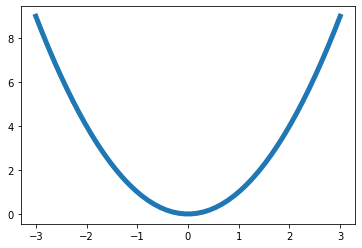

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


def update_title(axes):
    axes.set_title(datetime.now())
    axes.figure.canvas.draw()

fig, ax = plt.subplots()

x = np.linspace(-3, 3)
ax.plot(x, x ** 2)

# Create a new timer object. Set the interval to 100 milliseconds
# (1000 is default) and tell the timer what function should be called.
timer = fig.canvas.new_timer(interval=100)
timer.add_callback(update_title, ax)
timer.start()

# Or could start the timer on first figure draw:
# def start_timer(event):
#     timer.start()
#     fig.canvas.mpl_disconnect(drawid)
# drawid = fig.canvas.mpl_connect('draw_event', start_timer)

plt.show()